<a href="https://colab.research.google.com/github/anadiedrichs/tensoRflowLite/blob/master/Keras_Demo_R_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Librerías a utilizar

In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.1     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [ ]:
install.packages("keras")


In [2]:
library(keras)

In [3]:
sessionInfo()

R version 3.6.3 (2020-02-29)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 18.04.3 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/openblas/libblas.so.3
LAPACK: /usr/lib/x86_64-linux-gnu/libopenblasp-r0.2.20.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] keras_2.3.0.0   forcats_0.5.0   stringr_1.4.0   dplyr_1.0.2    
 [5] purrr_0.3.4     readr_1.3.1     tidyr_1.1.1     tibble_3.0.3   
 [9] ggplot2_3.3.2   tidyverse_1.3.0

loaded via a namespace (and not attached):
 [1] reticulate_1.16  pbdZMQ_0.3-3     tidyselect_1

## Prueba ejemplo base de keras con dataset MNIST

Codigo fuente del ejemplo tomado e inspirado en 

https://rpubs.com/lauren_bren/keras


In [4]:
mnist <- dataset_mnist() # Load the MNIST dataset
train_images <- mnist$train$x # create a 60,000x28x28 tensor for the training images
train_labels <- mnist$train$y # create a 60,000-element vector for the training labels
test_images <- mnist$test$x   # create a 10,000x28x28 tensor for the test images
test_labels <- mnist$test$y   # create a 10,000-element vector for the test labels

In [5]:
str(train_images)

 int [1:60000, 1:28, 1:28] 0 0 0 0 0 0 0 0 0 0 ...


In [6]:
str(train_labels)

 int [1:60000(1d)] 5 0 4 1 9 2 1 3 1 4 ...


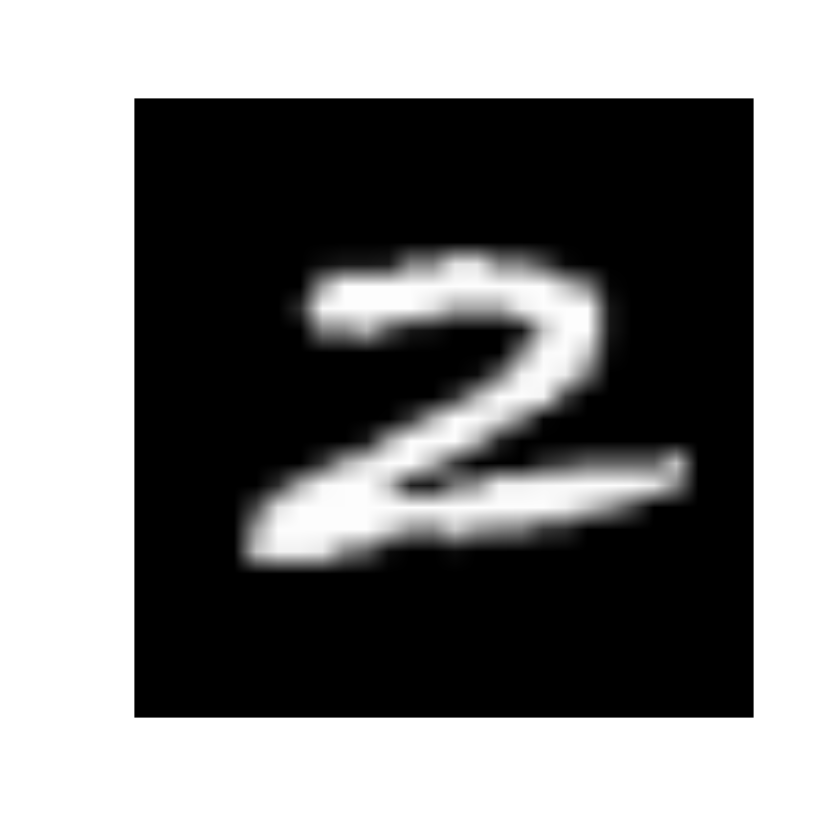

In [7]:
digit <- train_images[200,,]      # select the 200th training image
plot(as.raster(digit, max = 255)) # plot it!

In [8]:
network <- keras_model_sequential() %>%  # create a linear stack of layers
  layer_dense(units = 784, activation = "relu", input_shape = c(28 * 28)) %>%  # input layer
  layer_dense(units = 512, activation = "relu") %>%                            # hidden layer
  layer_dense(units = 10,  activation = "softmax")                            # output layer

In [9]:
network %>% compile(
  optimizer = "rmsprop",             # network will update itself based on the training data & loss
  loss = "categorical_crossentropy", # measure mismatch between y_pred and y, calculated after each minibatch
  metrics = c("accuracy")            # measure of performace - correctly classified images
)

In [10]:
train_images <- array_reshape(train_images, c(60000, 28 * 28)) # Unfold each 28x28 image into a linear vector of 784. Train_images was an image cube, now it's a 2d matrix where each row is an image.
train_images <- train_images / 255  # Normalize each element in the matrix to [0,1]

test_images <- array_reshape(test_images, c(10000, 28 * 28)) # Do the same for the test images
test_images <- test_images / 255

dim(train_images) # Check to see that the dimensions are now correct

[1] 60000   784

In [11]:
dim(test_images)

[1] 10000   784

In [12]:
train_labels <- to_categorical(train_labels) # makes key-value boolean dummy vars out of numerical vectors
test_labels <- to_categorical(test_labels)   # do the same with the test labels

dim(train_labels)

[1] 60000    10

In [13]:
history <- network %>% fit(train_images, train_labels, epochs = 20, batch_size = 1000, validation_split = 0.1)

`geom_smooth()` using formula 'y ~ x'



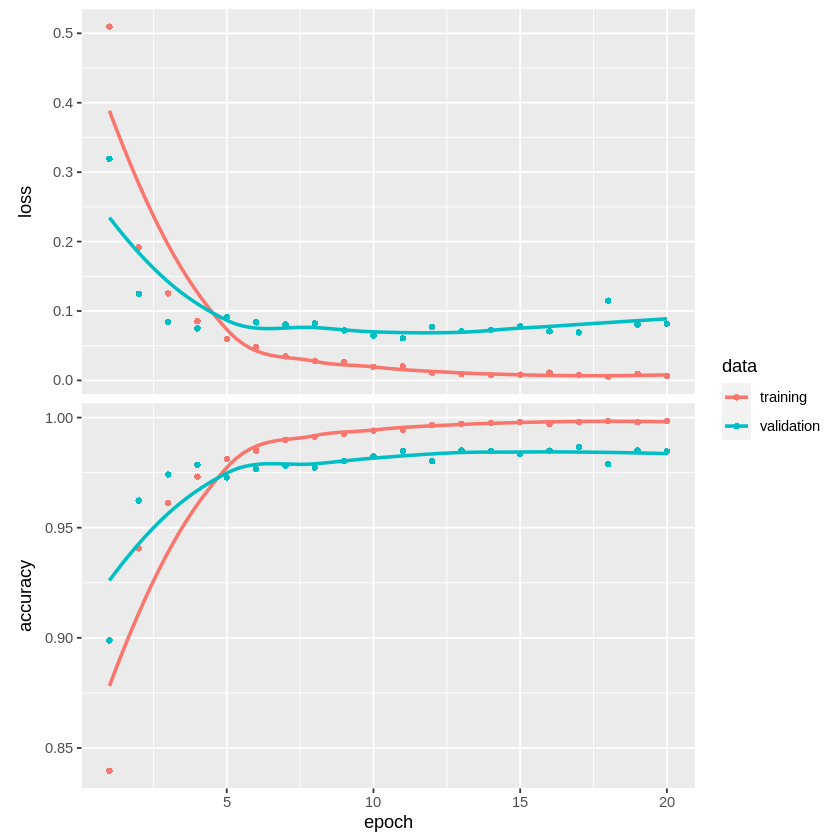

`geom_smooth()` using formula 'y ~ x'



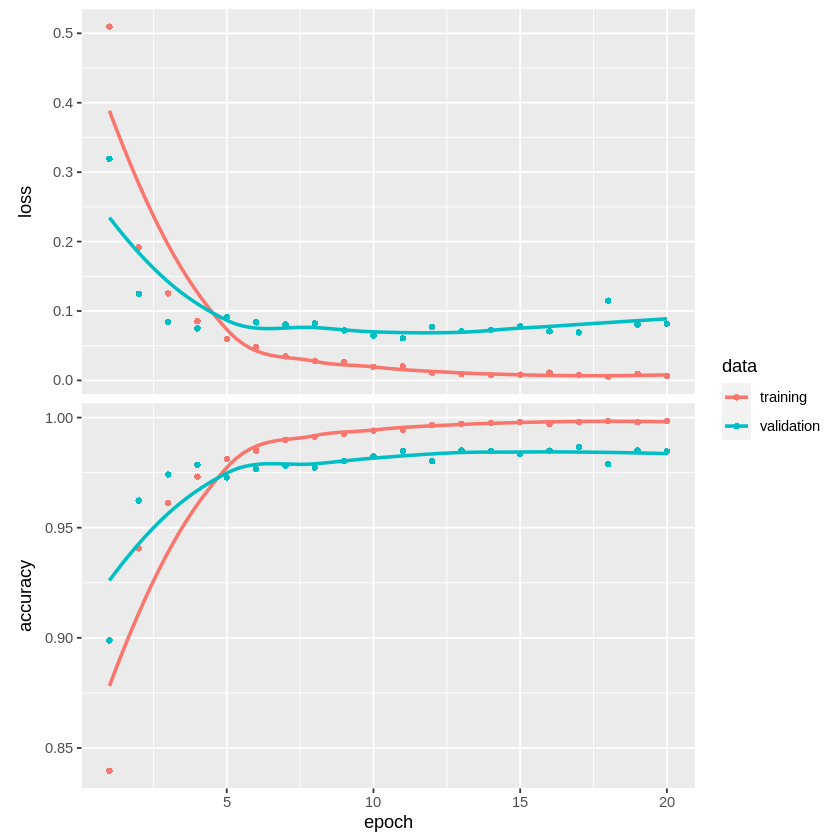

In [15]:
plot(history)

In [16]:
network %>% predict_classes(test_images[1:10,]) # display the predicted category for the first ten test images

[1] 7 2 1 0 4 1 4 9 5 9

In [17]:
mnist$test$y[1:10] # display the actual labels for the first ten test images (subtract one from the array index t

[1] 7 2 1 0 4 1 4 9 5 9

In [18]:
network %>% evaluate(test_images, test_labels)

loss   accuracy 
0.07639234 0.98409998

## tf model file

Guardar modelo keras, levantarlo, convertirlo a tflite

In [19]:
network %>% save_model_tf("model")

Guarda el modelo en la carpeta o directorio model

In [20]:
list.files("model")

[1] "assets"         "saved_model.pb" "variables"

In [21]:
new_model <- load_model_tf("model")
summary(new_model)

Model: "sequential"
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
dense (Dense)                       (None, 784)                     615440      
________________________________________________________________________________
dense_1 (Dense)                     (None, 512)                     401920      
________________________________________________________________________________
dense_2 (Dense)                     (None, 10)                      5130        
Total params: 1,022,490
Trainable params: 1,022,490
Non-trainable params: 0
________________________________________________________________________________


## HD5 keras format file model



In [22]:
network %>% save_model_hdf5("my_model.h5")

In [23]:
list.files()

[1] "model"       "my_model.h5" "sample_data"

In [24]:
new_model <- load_model_hdf5("my_model.h5")
summary(new_model)

Model: "sequential"
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
dense (Dense)                       (None, 784)                     615440      
________________________________________________________________________________
dense_1 (Dense)                     (None, 512)                     401920      
________________________________________________________________________________
dense_2 (Dense)                     (None, 10)                      5130        
Total params: 1,022,490
Trainable params: 1,022,490
Non-trainable params: 0
________________________________________________________________________________


In [26]:
tensorflow::tf_version()

[1] ‘2.3’

## objeto tf

Prueba de acceso a tf$ llamando a libreria tensorflow 

In [28]:
tensorflow::tf$abs(c(-3,-5,3))

tf.Tensor([3. 5. 3.], shape=(3,), dtype=float32)

## ggplot test


In [35]:
install.packages(c("gridExtra","viridis"))
library(ggplot2)
library(gridExtra)
library(viridis)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: viridisLite



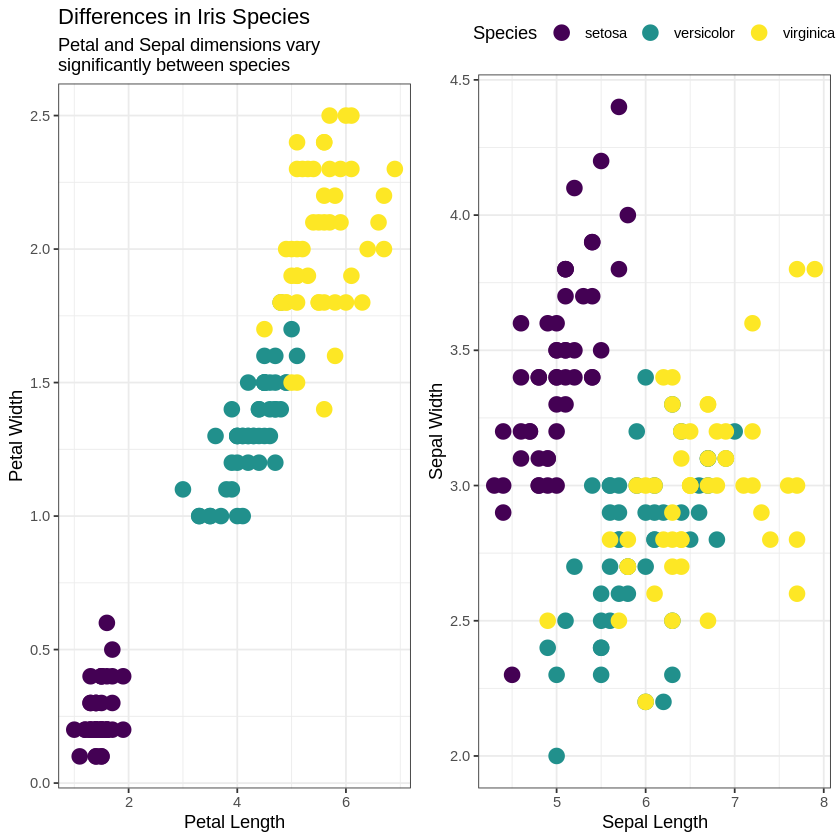

In [36]:
p1 <- iris %>%  
  ggplot(aes(Petal.Length, Petal.Width, color = Species)) +
  geom_point(size = 4) +
  labs(x = "Petal Length", y = "Petal Width") +
  scale_color_viridis(discrete = TRUE, option = "viridis") +
  theme_bw() +
  theme(legend.position = "none") +
  ggtitle("Differences in Iris Species",
          subtitle = str_c("Petal and Sepal dimensions vary",
                           "\n",
                           "significantly between species"))

p2 <- iris %>% 
  ggplot(aes(Sepal.Length, Sepal.Width, color = Species)) +
  geom_point(size = 4) +
  labs(x = "Sepal Length", y = "Sepal Width") +
  scale_color_viridis(discrete = TRUE, option = "viridis") +
  theme_bw() +
  theme(legend.position = "top")

grid.arrange(p1, p2, layout_matrix = rbind(c(1,2)))

## reticulate 

In [90]:
library(reticulate)

In [91]:

os <- import("os")
os$listdir(".")

[1] ".config"               "model"                 "my_model.h5"          
[4] "tflitetestmodel.RData" "sample_data"

Leer modelo tensorflow guardado.

In [99]:
a_model <- tensorflow::tf$lite$TFLiteConverter$from_saved_model("model")

In [89]:
str(a_model)

<tensorflow.lite.python.lite.TFLiteConverterV2>


convertirlo a tflite

In [104]:
converted <- tensorflow::tf$lite$TFLiteConverter$convert(a_model)

ahora guardarlo en binario

In [105]:
py <- import_builtins()
with(py$open("modeltf.tflite", "wb") %as% file, {
  file$write(converted)
})

[1] 4091912

abrir o levantar modelo tflite